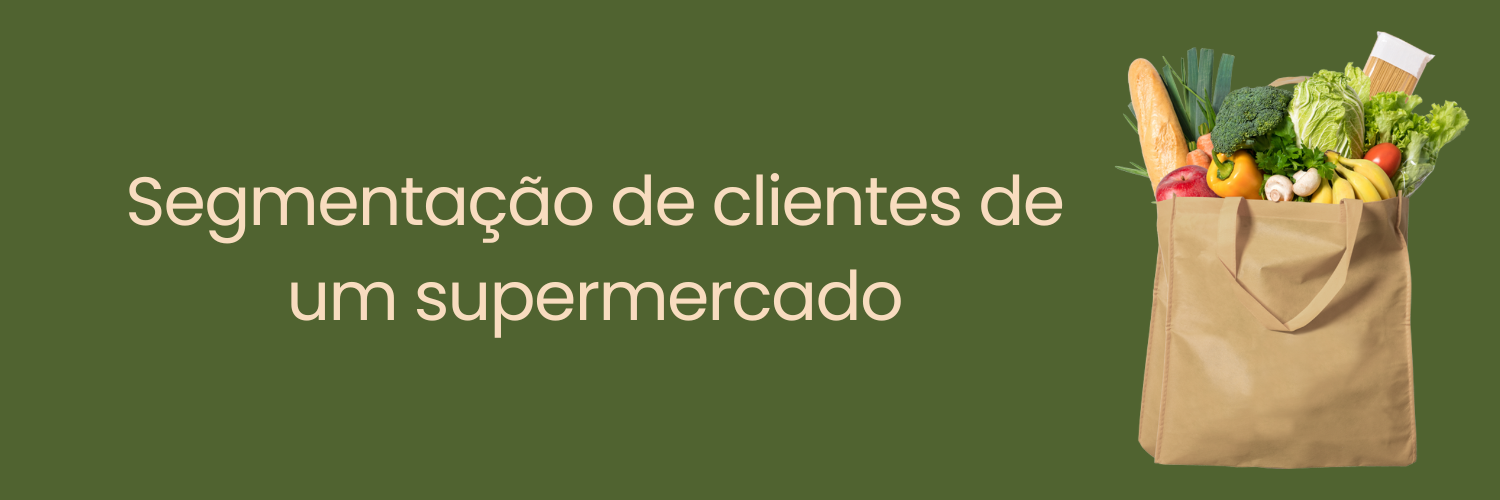

# Contexto

No contexto competitivo do varejo, as empresas que entendem as necessidades e preferências de seus clientes têm uma vantagem significativa. Isso permite que as empresas ofereçam produtos e serviços mais personalizados e relevantes.

Este projeto procura identificar padrões de comportamento dos clientes de um supermercado. Para isso, foram utilizados dados que abrangem desde as preferências de compra até as respostas a campanhas promocionais e adotada a estratégia de segmentação de clientes.

## Segmentação de Clientes

A **segmentação de clientes** é o processo de categorizar e agrupar clientes com características e comportamentos similares, permitindo estratégias de marketing mais direcionadas e personalizadas. No nosso contexto de um supermercado que atua em diferentes canais (loja física, catálogo e online), a segmentação oferece inúmeras vantagens estratégicas.

*Personalização de Estratégias de Marketing*: Ao entender os diferentes grupos de clientes, o supermercado pode adaptar suas estratégias de marketing para atender às necessidades específicas de cada segmento. Isso resulta em campanhas mais eficazes e direcionadas, maximizando o retorno sobre o investimento em marketing.

*Otimização de Ofertas e Promoções*: A análise de clusters permite identificar quais grupos de clientes têm maior probabilidade de responder positivamente a ofertas e campanhas promocionais. Isso possibilita ao supermercado direcionar seus esforços promocionais de maneira mais eficiente, aumentando a participação dos clientes em promoções.

*Melhoria na Experiência do Cliente*: Entender as necessidades específicas de cada segmento possibilita ao supermercado aprimorar a experiência do cliente. Seja no ambiente físico da loja, no catálogo ou no site, personalizar a abordagem de acordo com as preferências dos clientes resulta em maior satisfação e fidelização.


## Objetivo

O objetivo deste projeto é realizar a segmentação ds clientes de um supermercado multicanal. Após a segmentação, cada grupo será analisado para identificar suas características e comportamentos. As análises são essenciais, pois embasarão decisões estratégicas na área de negócios do supermercado

As principais etapas incluem análise exploratória, engenharia de atributos, normalização, aplicação do método de Elbow e implementação do algoritmo K-Means.


# Dados

## Conjunto de Dados

O conjunto de dados foi disponibilizado em 2021 na comunidade do Kaggle. Ele foi compartilhado por Akash Patel.

Você pode acessar o conjunto de dados *Customer Personality Analysis* [aqui](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data).

## Acessibilidade e privacidade dos dados

Na seção [Data Card](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data) é informado que o conjunto de dados utiliza a licença **CC0: Public Domain**.

A [licença CC0](https://creativecommons.org/publicdomain/zero/1.0/deed.pt_BR) permite a renúncia de todos os direitos sobre uma obra, possibilitando que outros construam, melhorem e reutilizem o trabalho para qualquer finalidade, sem restrições legais de direitos autorais. Em outras palavras, você pode copiar, modificar e distribuir o trabalho, até mesmo para fins comerciais, sem a necessidade de obter autorização.

## Informações sobre o conjunto de dados

Os dados abrangem informações demográficas, comportamentais e de compra de clientes. As variáveis foram distribuidas em quatro categorias para termos um melhor detalhamento e análise dos dados.

## Dicionário das variáveis

**Pessoas (People)**: Informações demográficas e de inscrição do cliente.

* **ID**: Identificador único do cliente.
* **Year_Birth**: Ano de nascimento do cliente.
* **Education**: Nível educacional do cliente
* **Marital_Status**: Estado civil do cliente.
* **Income**: Renda familiar anual do cliente.
* **Kidhome**: Número de crianças na residência do cliente.
* **Teenhome**: Número de adolescentes na residência do cliente.
* **Dt_Customer**: Data de inscrição do cliente na empresa.
* **Recency**: Número de dias desde a última compra do cliente.
* **Complain**: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

**Produtos (Products)**: Detalhes sobre os gastos do cliente em categorias específicas de produtos.

* **MntWines**: Valor gasto em vinhos nos últimos 2 anos.
* **MntFruits**: Valor gasto em frutas nos últimos 2 anos.
* **MntMeatProducts**: Valor gasto em produtos de carne nos últimos 2 anos.
* **MntFishProducts**: Valor gasto em produtos de peixe nos últimos 2 anos.
* **MntSweetProducts**: Valor gasto em produtos doces nos últimos 2 anos.
* **MntGoldProds**: Valor gasto em produtos ouro nos últimos 2 anos.

**Promoção (Promotion)**: Informações sobre a participação dos clientes em campanhas de marketing, como o número de compras feitas com desconto e a aceitação de ofertas.

* **AcceptedCmp1**: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário.
* **AcceptedCmp2**: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário.
* **AcceptedCmp3**: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário.
* **AcceptedCmp4**: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário.
* **AcceptedCmp5**: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário.
* **Response**: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário.

**Local (Place)**: Reflete a preferência do cliente em termos de canais de compra, seja online, através de catálogo ou em lojas físicas.


* **NumDealsPurchases**: Número de compras feitas com desconto.
* **NumWebPurchases**: Número de compras feitas através do site da empresa.
* **NumCatalogPurchases**: Número de compras feitas utilizando catálogo.
* **NumStorePurchases**: Número de compras feitas diretamente em lojas físicas.
* **NumWebVisitsMonth**: Número de visitas ao site da empresa no último mês.

## Instalando e Carregando os Pacotes

In [ ]:
from platform import python_version
print('Versão da Linguagem Python:', python_version())

Versão da Linguagem Python: 3.10.12


In [ ]:
# Manipulação dos dados
import pandas  as pd
import numpy   as np
from datetime  import datetime
from functools import reduce

# Visualização
import seaborn           as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from yellowbrick.cluster import KElbowVisualizer

# Normalização
from sklearn.preprocessing import MinMaxScaler

# Machine Learning
from sklearn.cluster       import KMeans

# Outras
import pickle
import warnings
warnings.filterwarnings("ignore")

## Carregando os Dados

In [ ]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

In [ ]:
num_linhas = df.shape[0]
num_colunas = df.shape[1]

print(f"O conjunto de dados contém {num_linhas} linhas e {num_colunas} colunas.")

O conjunto de dados contém 2240 linhas e 29 colunas.


In [ ]:
df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Análise Exploratória de Dados

Conforme descrito anteriormente, as variáveis foram separadas em categorias: Pessoas, Produtos, Promoção e Local.

Para cada categoria realizamos as análises das variáveis categóricas e numéricas. Para tal, criamos funções para exibir os gráficos para cada tipo e as colunas com valores nulos.

Além disso, foi criado um novo DataFrame para cada categoria, mantendo a coluna *ID* para todos, utilizada para fazer a junção dos dados.

O K-means é um algoritmo que depende da distância euclidiana entre pontos de dados em um espaço multidimensional. Sendo assim, para sua aplicação eficiente, é necessário que todas as variáveis sejam representadas numericamente. Dado esse requisito, realizamos a conversão das variáveis categóricas em valores numéricos.

**Função para os valores nulos**

In [ ]:
def show_null(df):
    # somar a quantidade de nulos em cada coluna, ordenar de forma descrescente e salvar o index para usar posteriormente
    null_columns = ((df.isnull().sum(axis=0)/len(df))*100).sort_values(ascending=False).index

    # quantidade de nulos, porcentagens e tipos de cada coluna
    null_data = pd.concat([df.isnull().sum(axis=0),
                           ((round((df.isnull().sum(axis=0)/len(df))*100,2))).sort_values(ascending=False),
                           df.loc[:, df.columns.isin(list(null_columns))].dtypes],
                           axis=1)

    # nomear as colunas e ordernar pela porcentagem
    null_data = null_data.rename(columns={0: 'quantidade',
                                          1: 'porcentagem',
                                          2: 'tipo'}).sort_values(ascending=False,
                                                                  by='porcentagem')

    return null_data

**Função para dois subplots: boxplot e stripplot de variáveis numéricas**



In [ ]:
def plot_num(df, feature):
    fig = plt.figure(figsize=(10, 6))

    # Cria a grade: 1 linha e 2 colunas (teremos 2 plots)
    gs = GridSpec(1, 2)

    # Contruindo o boxplot, gs[0,0] = linha 0 e coluna 0
    ax_boxplot = fig.add_subplot(gs[0, 0])
    sns.boxplot(y=feature, data=df, color='#1f78b4', ax=ax_boxplot, linewidth=1)
    ax_boxplot.set_ylabel(feature)
    ax_boxplot.yaxis.grid(False)

    # Stripplot
    ax_stripplot = fig.add_subplot(gs[0, 1])
    sns.stripplot(y=df[feature], color='#808080', ax=ax_stripplot)
    ax_stripplot.yaxis.grid(False)
    ax_stripplot.set_ylabel(None)

    plt.show()

Com esses gráficos podemos visualizar a distribuição de uma variável numérica.

*Boxplot*: Fornece informações sobre a dispersão, mediana e presença de outliers na distribuição da variável numérica.

*Stripplot*: Mostra a distribuição detalhada dos pontos de dados, destacando a densidade e a dispersão.

**Função para countplot de variáveis categóricas**

In [ ]:
def plot_cat(df, feature):
    fig = plt.figure(figsize=(10, 6))

    # Gráfico que traz as contagens para cada valor de texto
    ax = sns.countplot(data=df, x=feature, width=0.5)

    # Nos patches temos as posições das barras (x) e o máximo do y para colocar os números em cima
    for p in ax.patches:
        ax.annotate(f'\n{int(p.get_height())}',  # Informações
                    (p.get_x() + p.get_width() / 2, p.get_height() + 5),  # Coordenadas
                    ha='center',
                    color='black',
                    fontsize=10)

    ax.yaxis.grid(False)

    plt.xlabel('\n' + feature)
    plt.ylabel('Quantidade de Clientes')
    plt.show()

O countplot é um tipo de gráfico de barras utilizado para visualizar a distribuição de uma variável categórica, mostrando a contagem de observações em cada categoria.

Agora seguiremos com as análises por categorias.

### Pessoas (People)

Informações demográficas e de inscrição do cliente.

* **ID**: Identificador único do cliente.
* **Year_Birth**: Ano de nascimento do cliente.
* **Education**: Nível educacional do cliente
* **Marital_Status**: Estado civil do cliente.
* **Income**: Renda anual familiar do cliente.
* **Kidhome**: Número de crianças na residência do cliente.
* **Teenhome**: Número de adolescentes na residência do cliente.
* **Dt_Customer**: Data de inscrição do cliente na empresa.
* **Recency**: Número de dias desde a última compra do cliente.
* **Complain**: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

In [ ]:
people = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
             'Recency', 'Complain']]

In [ ]:
people.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0


In [ ]:
people.describe(include = object).T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


In [ ]:
people.describe().drop(columns = ['ID'])

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,0.009375
std,11.984069,25173.076661,0.538398,0.544538,28.962453,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1.000000


In [ ]:
show_null(people)

,quantidade,porcentagem,tipo
Income,24,1.07,float64
ID,0,0.00,int64
Year_Birth,0,0.00,int64
Education,0,0.00,object
Marital_Status,0,0.00,object
Kidhome,0,0.00,int64
Teenhome,0,0.00,int64
Dt_Customer,0,0.00,object
Recency,0,0.00,int64
Complain,0,0.00,int64


Temos valores nulos apenas para a variável *Income*, então começaremos com a mesma.

#### Income

* Renda anual familiar do cliente



Para essa variável temos apenas 1,07% dos registros nulos, portanto optamos por removê-los.

In [ ]:
people.dropna(inplace=True)

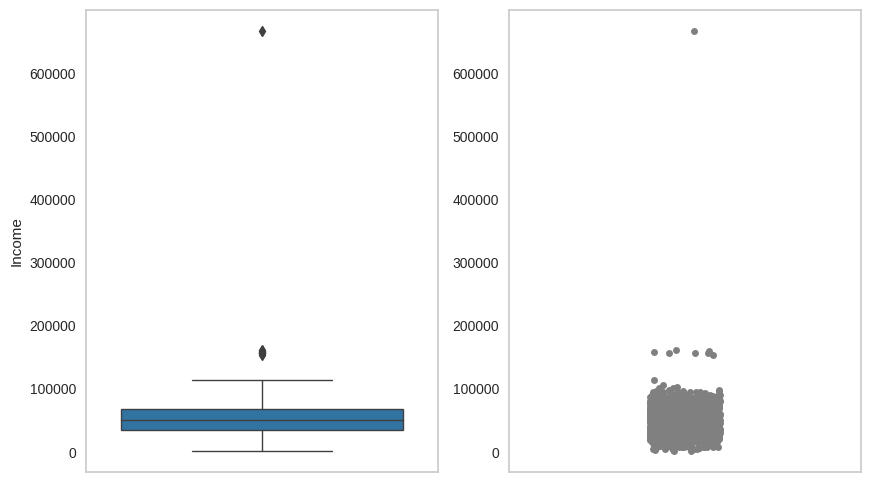

In [ ]:
plot_num(people, 'Income')

Além disso, identificamos a presença de alguns outliers, notadamente um cliente com uma renda anual superior a $600.000.

Dada a discrepância desse valor, optamos por remover os clientes cuja renda anual ultrapassa $200.000, contribuindo para uma análise mais equilibrada dos dados.

In [ ]:
people = people[people.Income < 200000]

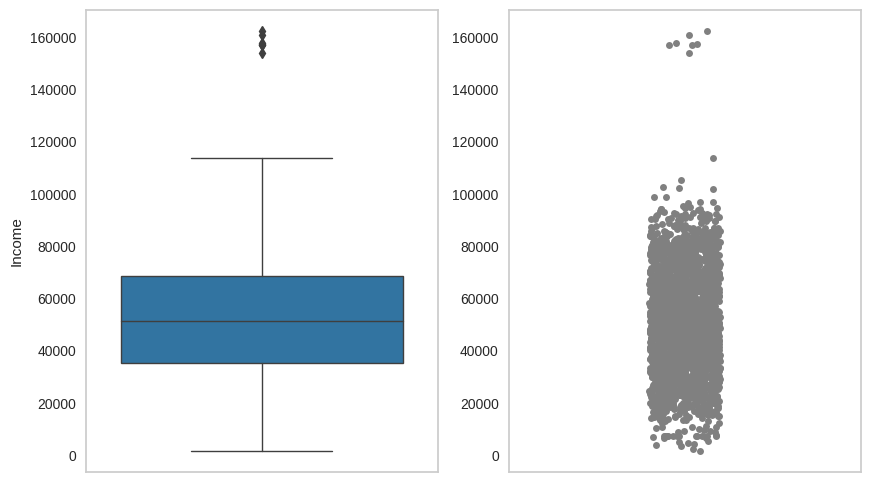

In [ ]:
plot_num(people, 'Income')

#### Year_Birth

* Ano de nascimento do cliente


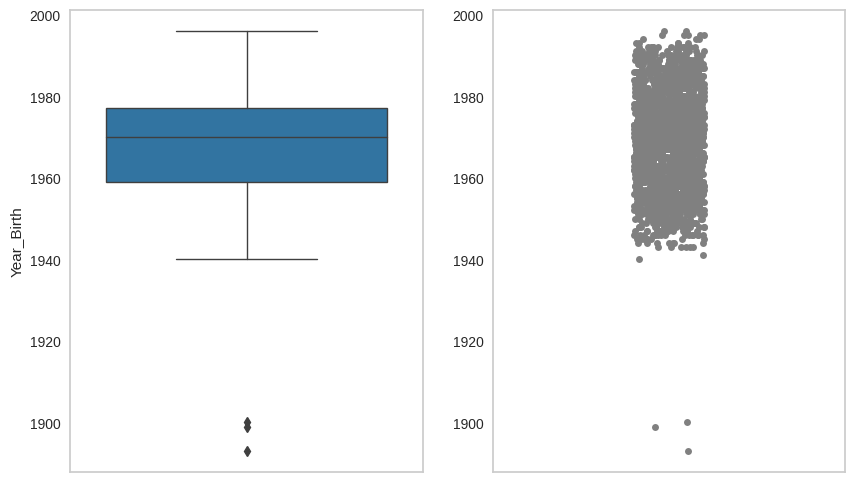

In [ ]:
plot_num(people, 'Year_Birth')

Identificamos a presença de três outliers relacionados a datas de nascimento anteriores a 1920. Esses valores parecem ser incorretos ou inconsistentes com o contexto. Portanto, optamos por removê-los.

In [ ]:
people = people[people.Year_Birth > 1930]

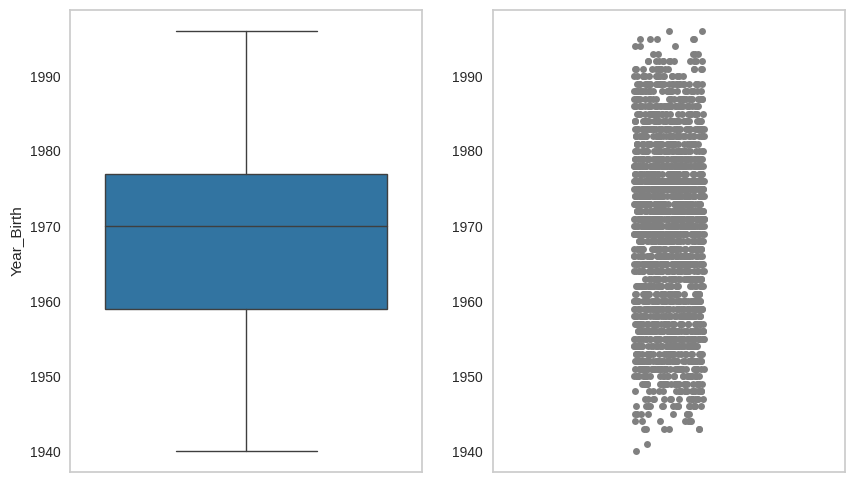

In [ ]:
plot_num(people, 'Year_Birth')

#### Education

* Nível educacional do cliente


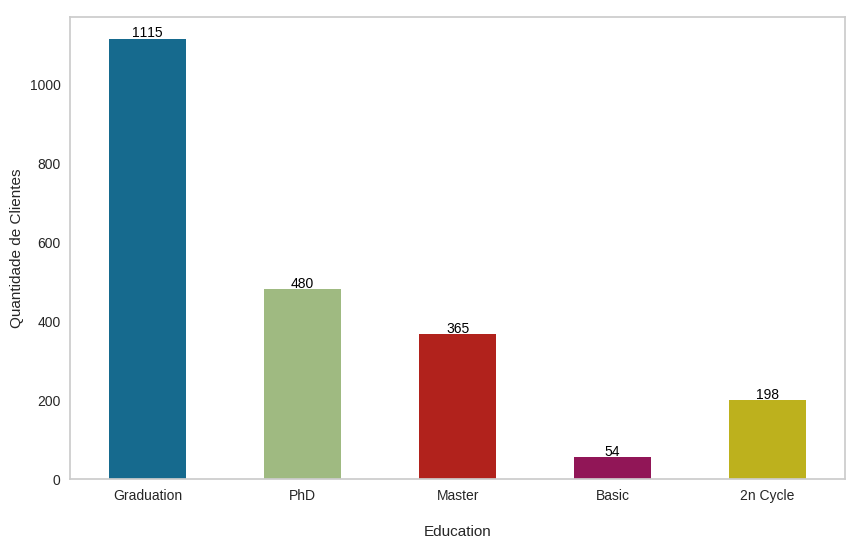

In [ ]:
plot_cat(people, 'Education')

Essa é uma variável categórica e ordinal, portanto convertemos os níveis educacionais em valores numéricos. A ordem estabelecida foi a seguinte:

* 0 (Basic): educação primária.
* 1 (2n Cycle): ensino médio.
* 2 (Graduation): graduação.
* 3 (Master): pós-graduação (mestrado).
* 4 (PhD): pós-graduação (doutorado).


In [ ]:
people.Education = people.Education.apply(lambda x: 0 if x=='Basic'
                       else(1 if x=='2n Cycle'
                            else(2 if x=='Graduation'
                                 else(3 if x =='Master'
                                      else(4 if x=='PhD' else None)))))

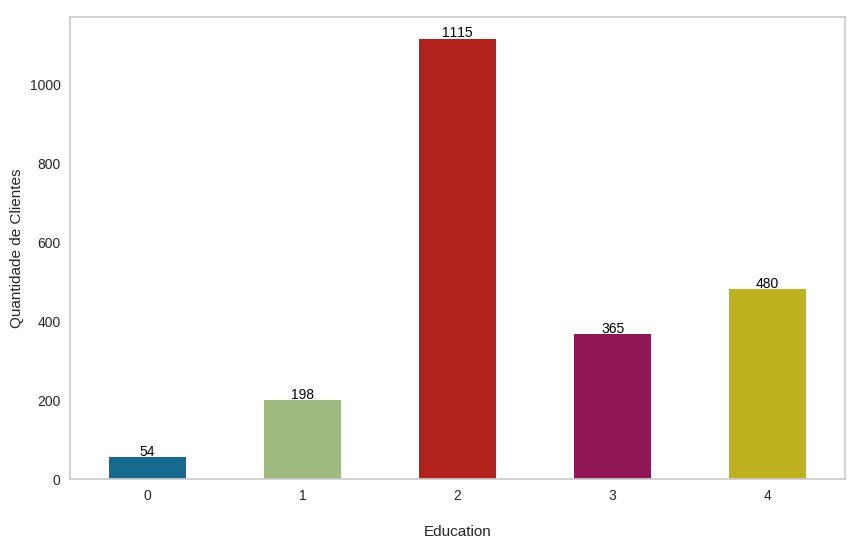

In [ ]:
plot_cat(people, 'Education')

#### Marital_Status

* Estado civil do cliente


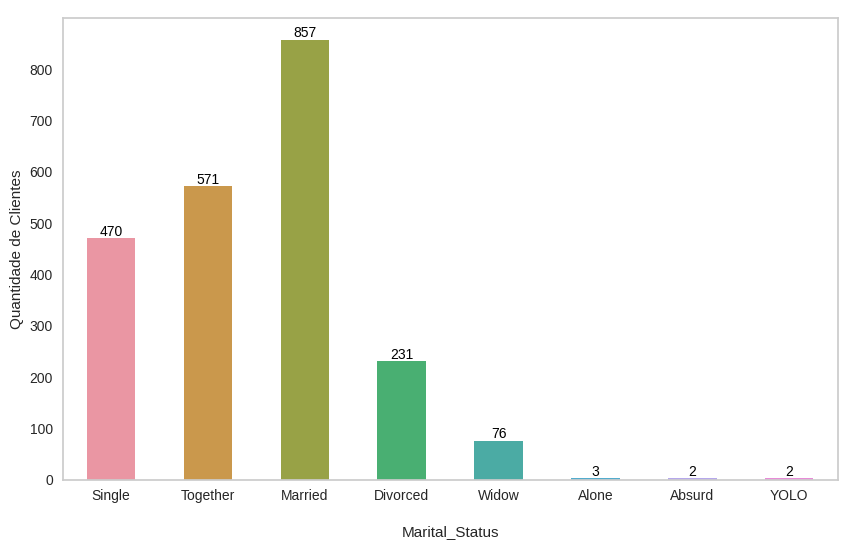

In [ ]:
plot_cat(people, 'Marital_Status')

Eliminamos o valor *Absurd*, pois pode ter sido erro na coleta de dados.

Além disso, temos valores redundantes para esse atributo, então consideramos o seguinte:

* Foi considerado *Single*, se a pessoa respondeu Alone (mora sozinha) e YOLO (sem compromissos).
* Foi considerado *Together*, se a pessoa respondeu Married.

In [ ]:
people = people[people.Marital_Status != 'Absurd']

In [ ]:
people['Marital_Status'] = people['Marital_Status'].replace({'Alone': 'Single', 'YOLO': 'Single', 'Married': 'Together'})

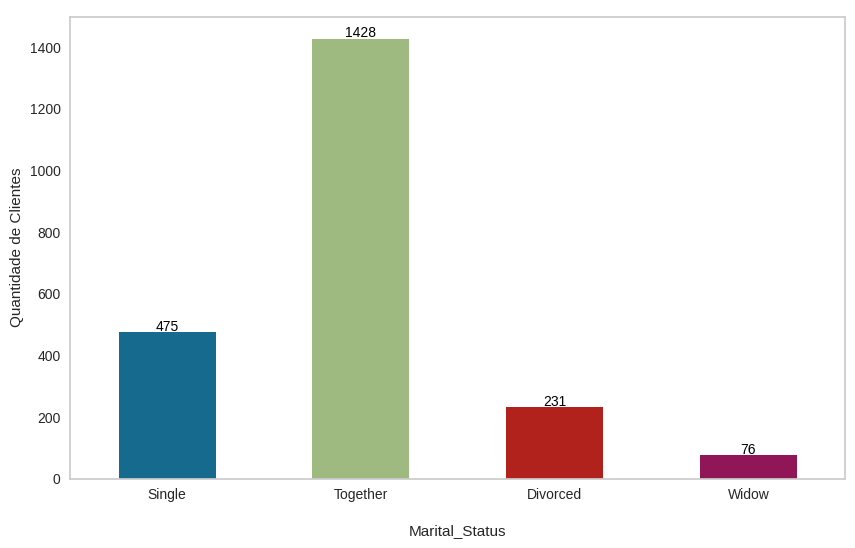

In [ ]:
plot_cat(people, 'Marital_Status')

Perceba que essa é uma variável categórica nominal, ou seja, não temos nenhum tipo de ordenação. Portanto, temos a transformamos em variável dummy, ou seja para cada categoria única, novas colunas foram criadas, cada uma contendo valores binários indicando a presença (1) ou ausência (0) daquela categoria.

In [ ]:
people.dtypes

ID                  int64
Year_Birth          int64
Education           int64
Marital_Status     object
Income            float64
Kidhome             int64
Teenhome            int64
Dt_Customer        object
Recency             int64
Complain            int64
dtype: object

Note que temos duas variáveis do tipo object. A variável *Dt_Costumer* representa a data de inscrição do cliente na empresa, portanto, a transformamos em tipo datetime.

In [ ]:
people.Dt_Customer = pd.to_datetime(people.Dt_Customer, dayfirst=True)

In [ ]:
people.dtypes

ID                         int64
Year_Birth                 int64
Education                  int64
Marital_Status            object
Income                   float64
Kidhome                    int64
Teenhome                   int64
Dt_Customer       datetime64[ns]
Recency                    int64
Complain                   int64
dtype: object

In [ ]:
people = pd.get_dummies(people)

In [ ]:
people.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,2,58138.0,0,0,2012-09-04,58,0,0,1,0,0
1,2174,1954,2,46344.0,1,1,2014-03-08,38,0,0,1,0,0
2,4141,1965,2,71613.0,0,0,2013-08-21,26,0,0,0,1,0
3,6182,1984,2,26646.0,1,0,2014-02-10,26,0,0,0,1,0
4,5324,1981,4,58293.0,1,0,2014-01-19,94,0,0,0,1,0


#### Kidhome e TeenHome

* Número de crianças na residência do cliente
* Número de adolescentes na residência do cliente


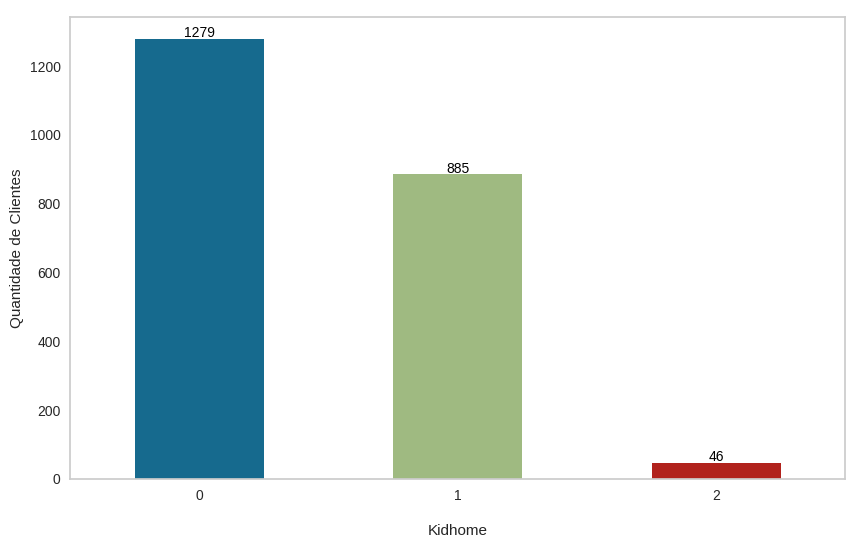

In [ ]:
plot_cat(people, 'Kidhome')

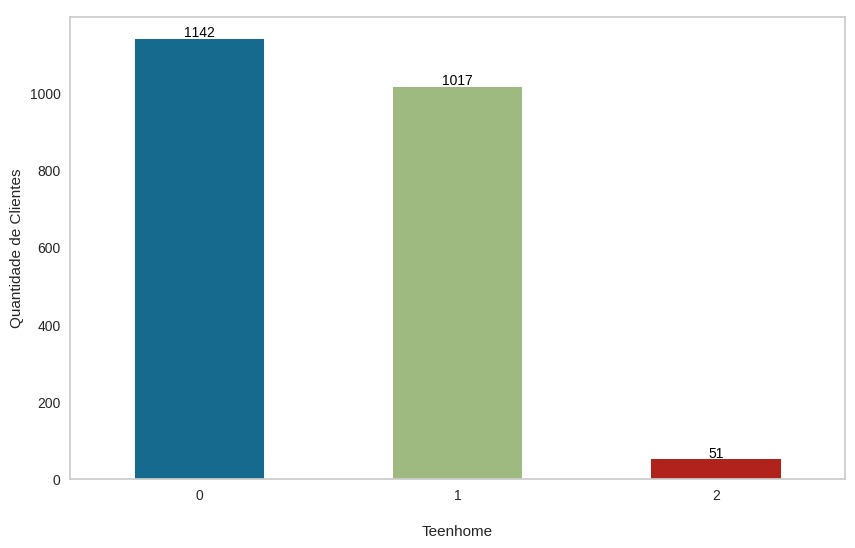

In [ ]:
plot_cat(people, 'Teenhome')

Tanto *Kidhome* quanto *TeenHome* indicam quantas crianças/adolescentes têm na residência. Então, fizemos uma generalização e unificamos essas informações em uma coluna denominada *ChildrenHome*.


In [ ]:
people['ChildrenHome'] = people.Kidhome + people.Teenhome

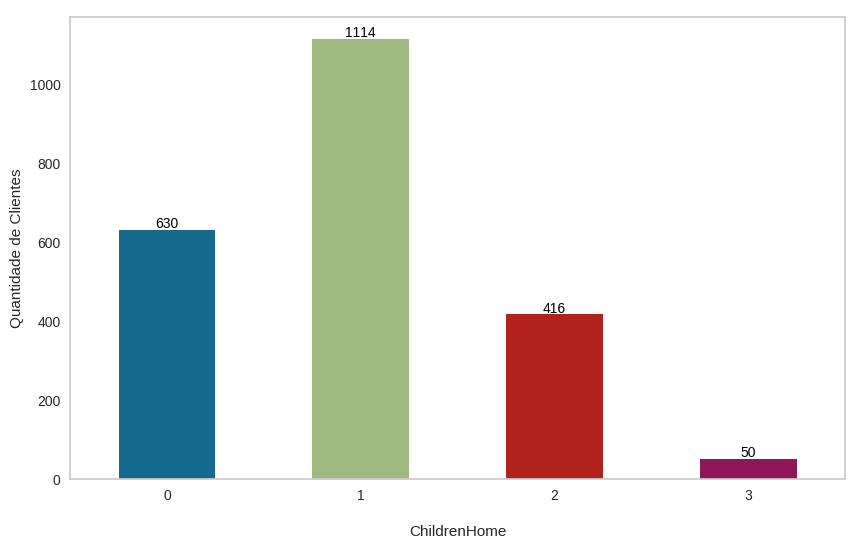

In [ ]:
plot_cat(people, 'ChildrenHome')

In [ ]:
people.drop(columns=['Kidhome', 'Teenhome'], inplace=True)

In [ ]:
people.head()

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,Complain,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome
0,5524,1957,2,58138.0,2012-09-04,58,0,0,1,0,0,0
1,2174,1954,2,46344.0,2014-03-08,38,0,0,1,0,0,2
2,4141,1965,2,71613.0,2013-08-21,26,0,0,0,1,0,0
3,6182,1984,2,26646.0,2014-02-10,26,0,0,0,1,0,1
4,5324,1981,4,58293.0,2014-01-19,94,0,0,0,1,0,1


#### Dt_Customer

* Data de inscrição do cliente na empresa


In [ ]:
# valor minimo
people.Dt_Customer.min()

Timestamp('2012-07-30 00:00:00')

In [ ]:
# valor maximo
people.Dt_Customer.max()

Timestamp('2014-06-29 00:00:00')

Seria interessante ter uma coluna para o *lifetime* do cliente (valor do tempo de vida do cliente), pois é uma estimativa do período de tempo durante o qual um cliente permanecerá ativo e fará compras em um determinado estabelecimento.

Para tal, calculamos a data mais recente estimada, considerando a última data de cadastro dos clientes e o número de dias desde a última compra (Recency). Adicionamos mais um dia a essa data.

Criamos a nova coluna *LifeTime*, representando o tempo de vida estimado dos usuários em meses, com base na diferença entre a data de cadastro e a data calculada anteriormente (2014-10-05).

In [ ]:
(people['Dt_Customer'] + pd.to_timedelta(people['Recency'], unit='d')).max()

Timestamp('2014-10-04 00:00:00')

In [ ]:
people['LifeTime'] = (pd.to_datetime('2014-10-05') - people['Dt_Customer']).dt.days/30

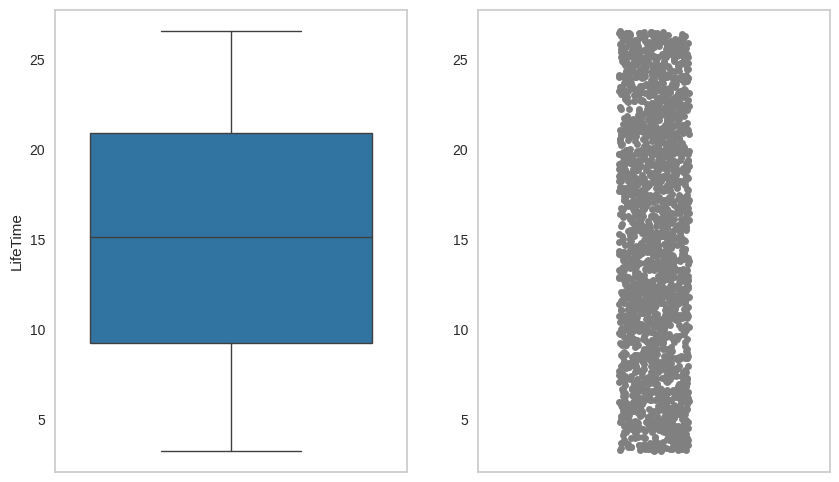

In [ ]:
plot_num(people, 'LifeTime')

Agora que temos a coluna *LifeTime* removemos a *Dt_Customer*.

In [ ]:
people.drop(columns=['Dt_Customer'], inplace=True)

#### Recency

* Número de dias desde a última compra do cliente


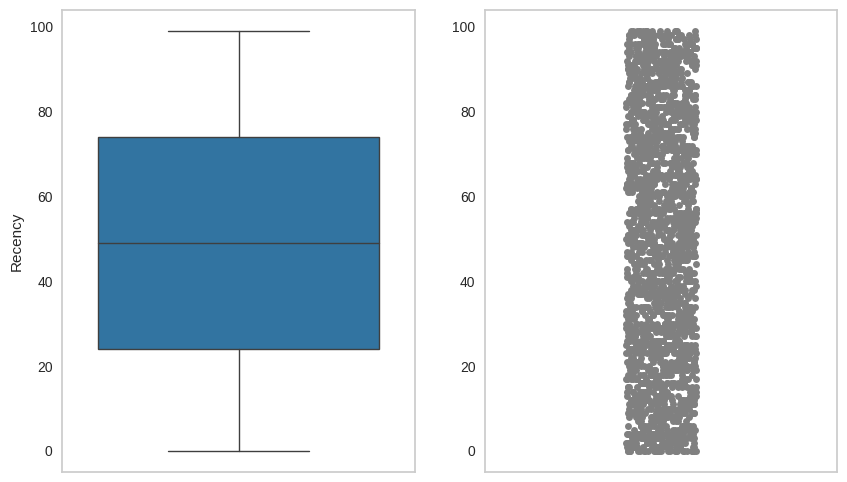

In [ ]:
plot_num(people, 'Recency')

Não foinecessário nenhum tipo de alteração.

#### Complain

* 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário

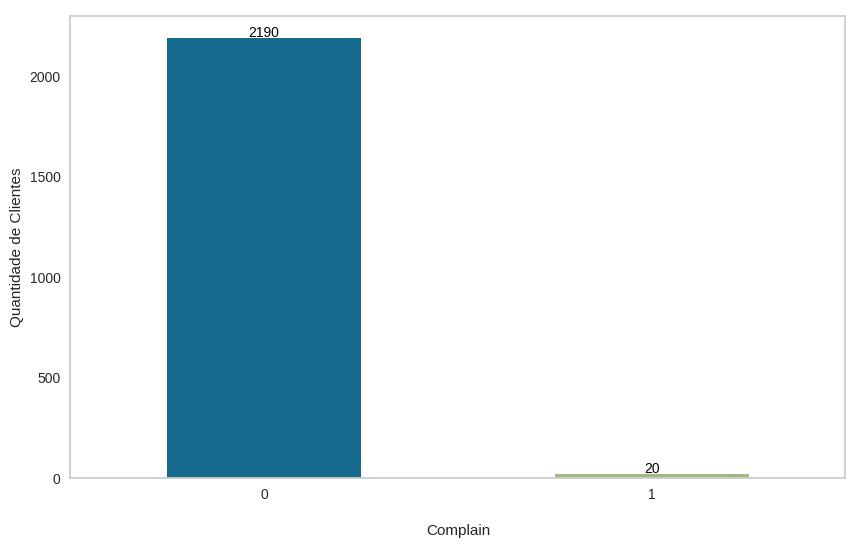

In [ ]:
plot_cat(people, 'Complain')

In [ ]:
no_complain = (people['Complain'].sum() / len(people)) * 100

print(f"A porcentagem de clientes que não reclamaram nos últimos 2 anos é: {no_complain:.2f}%")

A porcentagem de clientes que não reclamaram nos últimos 2 anos é: 0.90%


Dado essa porcentagem, é razoável considerar excluir essa variável, uma vez que não representa uma informação relevante.

In [ ]:
people.drop(columns=['Complain'], inplace=True)

In [ ]:
people.head()

,ID,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome,LifeTime
0,5524,1957,2,58138.0,58,0,1,0,0,0,25.366667
1,2174,1954,2,46344.0,38,0,1,0,0,2,7.033333
2,4141,1965,2,71613.0,26,0,0,1,0,0,13.666667
3,6182,1984,2,26646.0,26,0,0,1,0,1,7.900000
4,5324,1981,4,58293.0,94,0,0,1,0,1,8.633333


In [ ]:
people.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Income',
 'Recency',
 'Marital_Status_Divorced',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'ChildrenHome',
 'LifeTime']

In [ ]:
people.describe().drop(columns = ['ID']).T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2210.0,1968.908145,11.692924,1940.000000,1959.000000,1970.000000,1977.00,1996.000000
Education,2210.0,2.460633,1.004534,0.000000,2.000000,2.000000,3.00,4.000000
Income,2210.0,51940.342986,21527.264127,1730.000000,35208.500000,51369.000000,68480.75,162397.000000
Recency,2210.0,49.015837,28.955582,0.000000,24.000000,49.000000,74.00,99.000000
Marital_Status_Divorced,2210.0,0.104525,0.306009,0.000000,0.000000,0.000000,0.00,1.000000
Marital_Status_Single,2210.0,0.214932,0.410868,0.000000,0.000000,0.000000,0.00,1.000000
Marital_Status_Together,2210.0,0.646154,0.478270,0.000000,0.000000,1.000000,1.00,1.000000
Marital_Status_Widow,2210.0,0.034389,0.182268,0.000000,0.000000,0.000000,0.00,1.000000
ChildrenHome,2210.0,0.948416,0.749262,0.000000,0.000000,1.000000,1.00,3.000000
LifeTime,2210.0,15.056848,6.750088,3.266667,9.266667,15.133333,20.90,26.566667


In [ ]:
columns_to_count = [
    'Education',
    'Marital_Status_Divorced',
    'Marital_Status_Single',
    'Marital_Status_Together',
    'Marital_Status_Widow',
    'ChildrenHome'
]

# Criar um novo DataFrame para armazenar as contagens
counts_df = pd.DataFrame(index=columns_to_count, columns=['Value', 'Count'])

# Iterar sobre as colunas e calcular as contagens
for column in columns_to_count:
    counts = people[column].value_counts()
    counts_df.loc[column, 'Value'] = counts.index.astype(str)
    counts_df.loc[column, 'Count'] = counts.values

print(counts_df)

                                   Value                      Count
Education                [2, 4, 3, 1, 0]  [1114, 480, 364, 198, 54]
Marital_Status_Divorced           [0, 1]                [1979, 231]
Marital_Status_Single             [0, 1]                [1735, 475]
Marital_Status_Together           [1, 0]                [1428, 782]
Marital_Status_Widow              [0, 1]                 [2134, 76]
ChildrenHome                [1, 0, 2, 3]       [1114, 630, 416, 50]


**Observações:**

* Predominância de clientes com nível educacional correspondente à graduação
* A maioria dos clientes é casada e tem uma criança em casa;
* A faixa etária varia amplamente, desde clientes nascidos em 1940 até os mais jovens de 1996.
* A renda anual média familiar dos clientes é aproximadamente $51.940.

### Produtos (Products)



Detalhes sobre os gastos do cliente em categorias específicas de produtos.

* **MntWines**: Valor gasto em vinhos nos últimos 2 anos.
* **MntFruits**: Valor gasto em frutas nos últimos 2 anos.
* **MntMeatProducts**: Valor gasto em produtos de carne nos últimos 2 anos.
* **MntFishProducts**: Valor gasto em produtos de peixe nos últimos 2 anos.
* **MntSweetProducts**: Valor gasto em produtos doces nos últimos 2 anos.
* **MntGoldProds**: Valor gasto em produtos ouro nos últimos 2 anos.



In [ ]:
products = df[['ID','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [ ]:
products.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,635,88,546,172,88,88
1,2174,11,1,6,2,1,6
2,4141,426,49,127,111,21,42
3,6182,11,4,20,10,3,5
4,5324,173,43,118,46,27,15


In [ ]:
show_null(products)

,quantidade,porcentagem,tipo
ID,0,0.0,int64
MntWines,0,0.0,int64
MntFruits,0,0.0,int64
MntMeatProducts,0,0.0,int64
MntFishProducts,0,0.0,int64
MntSweetProducts,0,0.0,int64
MntGoldProds,0,0.0,int64


#### MntWines

* Valor gasto em vinhos nos últimos 2 anos

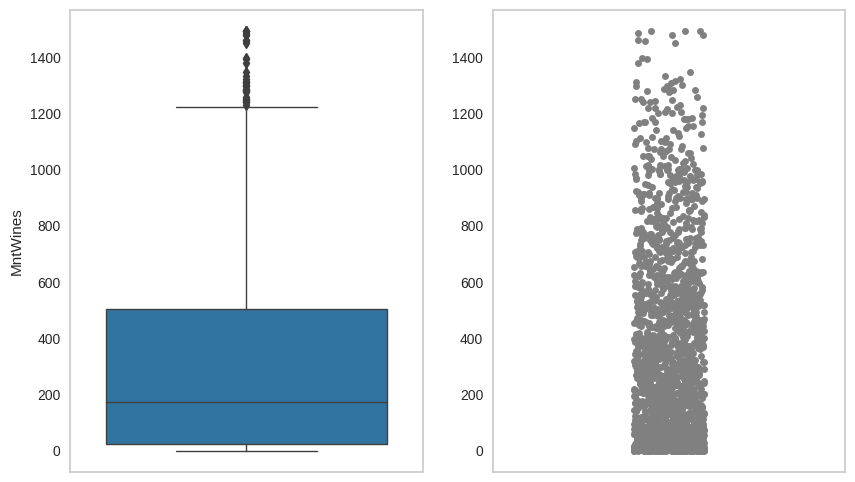

In [ ]:
plot_num(products, 'MntWines')

#### MntFruits

* Valor gasto em frutas nos últimos 2 anos


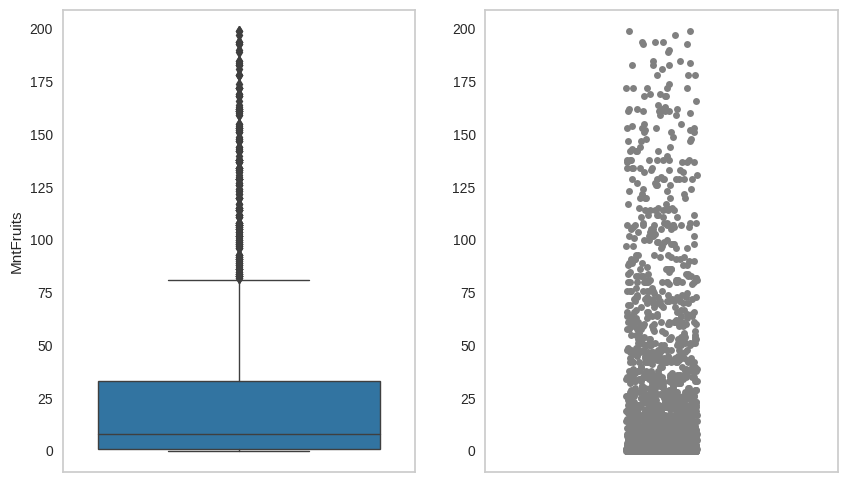

In [ ]:
plot_num(products, 'MntFruits')

#### MntMeatProducts

* Valor gasto em produtos de carne nos últimos 2 anos


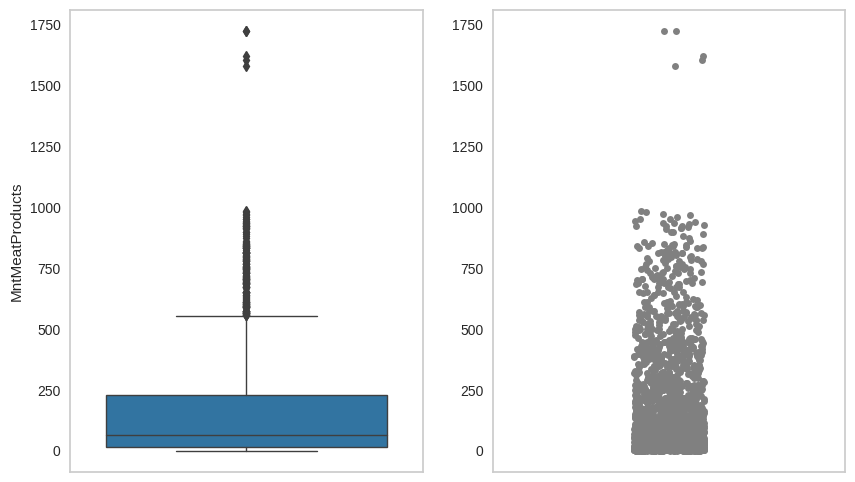

In [ ]:
plot_num(products, 'MntMeatProducts')

#### MntFishProducts

* Valor gasto em produtos de peixe nos últimos 2 anos


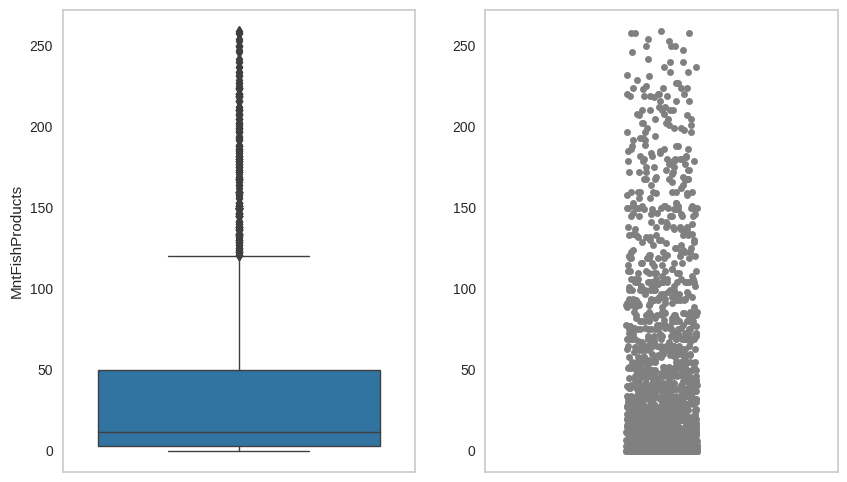

In [ ]:
plot_num(products, 'MntFishProducts')

#### MntSweetProducts

* Valor gasto em produtos doces nos últimos 2 anos


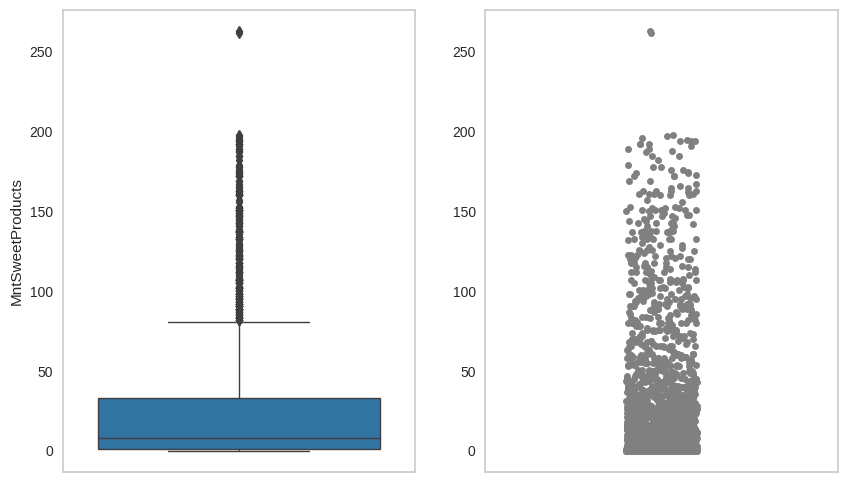

In [ ]:
plot_num(products, 'MntSweetProducts')

#### MntGoldProds

* Valor gasto em produtos ouro nos últimos 2 anos

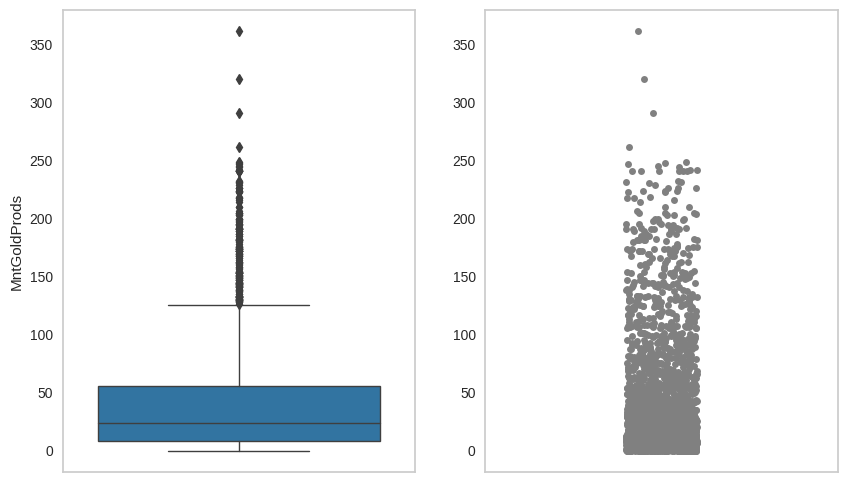

In [ ]:
plot_num(products, 'MntGoldProds')

Criamos uma nova coluna com o valor total gasto nos produtos.

In [ ]:
products['TotalAmountSpent'] = products.MntFishProducts + products.MntFruits + products.MntGoldProds \
+ products.MntMeatProducts + products.MntSweetProducts + products.MntWines

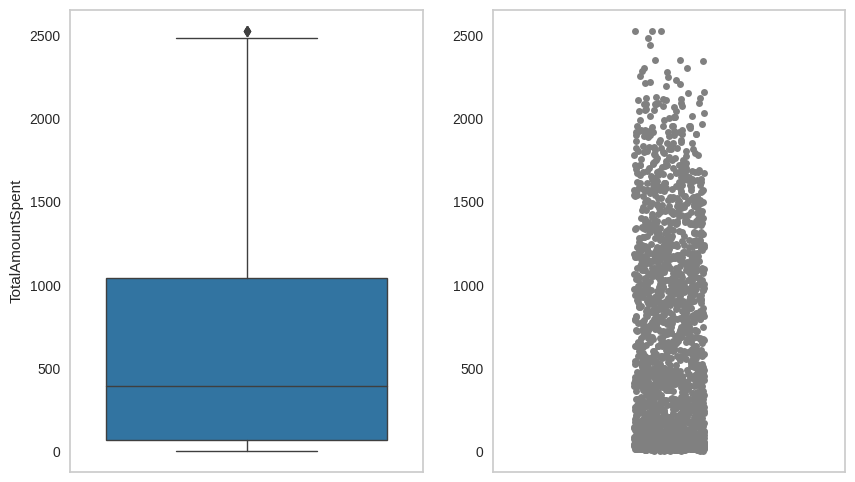

In [ ]:
plot_num(products, 'TotalAmountSpent')

Calculamos as proporções (0 a 1) para cada categoria.

In [ ]:
products.MntFishProducts = products.MntFishProducts/products['TotalAmountSpent']
products.MntFruits = products.MntFruits/products['TotalAmountSpent']
products.MntGoldProds = products.MntGoldProds/products['TotalAmountSpent']
products.MntMeatProducts = products.MntMeatProducts/products['TotalAmountSpent']
products.MntSweetProducts = products.MntSweetProducts/products['TotalAmountSpent']
products.MntWines = products.MntWines/products['TotalAmountSpent']

In [ ]:
products.describe()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,0.458481,0.049505,0.249508,0.071532,0.050777,0.120196,605.798214
std,3246.662198,0.228411,0.055867,0.126633,0.077909,0.061184,0.108988,602.249288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,0.289506,0.008924,0.156250,0.012571,0.008621,0.038095,68.750000
50%,5458.500000,0.457482,0.029840,0.233447,0.048193,0.033333,0.086294,396.000000
75%,8427.750000,0.639143,0.070237,0.328227,0.104703,0.070411,0.169768,1045.500000
max,11191.000000,0.963303,0.445545,0.997110,0.590909,0.945848,0.894150,2525.000000


In [ ]:
products.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent
0,5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1617
1,2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,27
2,4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,776
3,6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,53
4,5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,422


**Observações:**

* No que diz respeito aos gastos, a média é de $605, com um valor máximo de 2.525.

* Os produtos mais consumidos pertencem à categoria de vinhos, enquanto as frutas têm a menor demanda.

### Promoção (Promotion)

Informações sobre a participação dos clientes em campanhas de marketing, como o número de compras feitas com desconto e a aceitação de ofertas.

* **AcceptedCmp1**: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário.
* **AcceptedCmp2**: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário.
* **AcceptedCmp3**: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário.
* **AcceptedCmp4**: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário.
* **AcceptedCmp5**: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário.
* **Response**: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário.



In [ ]:
promotion = df[['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                'AcceptedCmp5', 'Response']]

In [ ]:
promotion.head()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,5524,0,0,0,0,0,1
1,2174,0,0,0,0,0,0
2,4141,0,0,0,0,0,0
3,6182,0,0,0,0,0,0
4,5324,0,0,0,0,0,0


In [ ]:
show_null(promotion)

,quantidade,porcentagem,tipo
ID,0,0.0,int64
AcceptedCmp1,0,0.0,int64
AcceptedCmp2,0,0.0,int64
AcceptedCmp3,0,0.0,int64
AcceptedCmp4,0,0.0,int64
AcceptedCmp5,0,0.0,int64
Response,0,0.0,int64


In [ ]:
promotion.describe()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107
std,3246.662198,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Criamos a coluna *AcceptedCmp* para o total de campanhas que foram aceitas.





In [ ]:
promotion['AcceptedCmp'] = promotion.AcceptedCmp1 + promotion.AcceptedCmp2 + promotion.AcceptedCmp3 + promotion.AcceptedCmp4 + \
promotion.AcceptedCmp5 + promotion.Response

In [ ]:
promotion['AcceptedCmp'].describe()

count    2240.000000
mean        0.446875
std         0.890543
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: AcceptedCmp, dtype: float64

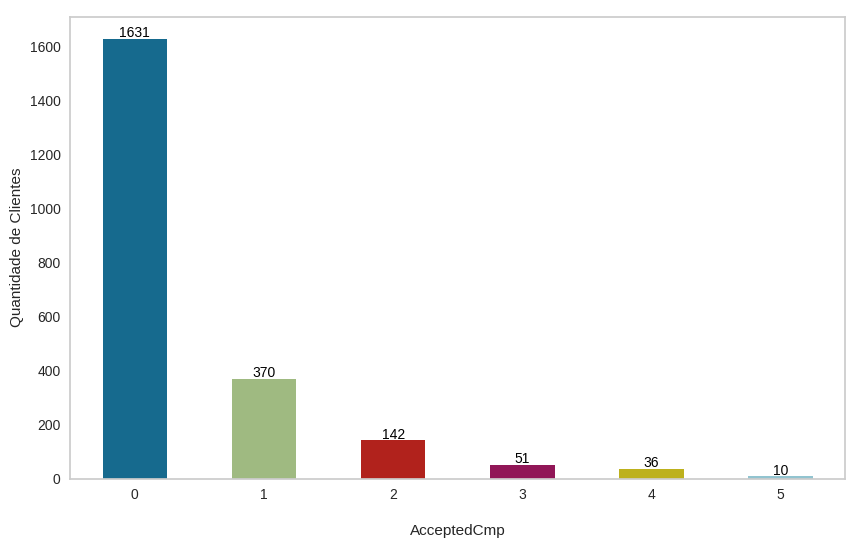

In [ ]:
plot_cat(promotion, 'AcceptedCmp')

Perceba que conforme as campanhas avançam o número de clientes que as aceitam reduz, por isso removemos essas colunas, mantendo apenas a *AcceptedCmp* e *ID* (necessária para o merge).

In [ ]:
promotion = promotion[['ID', 'AcceptedCmp']]

In [ ]:
promotion.head()

,ID,AcceptedCmp
0,5524,1
1,2174,0
2,4141,0
3,6182,0
4,5324,0


### Local (Place)

Reflete a preferência do cliente em termos de canais de compra, seja online, através de catálogo ou em lojas físicas.

* **NumDealsPurchases**: Número de compras feitas com desconto.
* **NumWebPurchases**: Número de compras feitas através do site da empresa.
* **NumCatalogPurchases**: Número de compras feitas utilizando catálogo.
* **NumStorePurchases**: Número de compras feitas diretamente em lojas físicas.
* **NumWebVisitsMonth**: Número de visitas ao site da empresa no último mês.

In [ ]:
place = df[['ID','NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth']]

In [ ]:
place.head()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth
0,5524,8,10,4,3,7
1,2174,1,1,2,2,5
2,4141,8,2,10,1,4
3,6182,2,0,4,2,6
4,5324,5,3,6,5,5


In [ ]:
show_null(place)

,quantidade,porcentagem,tipo
ID,0,0.0,int64
NumWebPurchases,0,0.0,int64
NumCatalogPurchases,0,0.0,int64
NumStorePurchases,0,0.0,int64
NumDealsPurchases,0,0.0,int64
NumWebVisitsMonth,0,0.0,int64


Criamos uma coluna com o total de compras, independente do canal.

In [ ]:
place['TotalPurchases'] = place.NumWebPurchases + place.NumCatalogPurchases + place.NumStorePurchases

In [ ]:
place.describe()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,4.084821,2.662054,5.790179,2.325000,5.316518,12.537054
std,3246.662198,2.778714,2.923101,3.250958,1.932238,2.426645,7.205741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000
50%,5458.500000,4.000000,2.000000,5.000000,2.000000,6.000000,12.000000
75%,8427.750000,6.000000,4.000000,8.000000,3.000000,7.000000,18.000000
max,11191.000000,27.000000,28.000000,13.000000,15.000000,20.000000,32.000000


In [ ]:
place[place.TotalPurchases == 0]

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
655,5555,0,0,0,0,0,0
981,3955,0,0,0,0,14,0
1245,6862,0,0,0,15,20,0
1524,11110,0,0,0,0,14,0
1846,9931,0,0,0,15,19,0
2132,11181,0,0,0,0,0,0


Temos poucos registros de pessoas que não fizeram compras, então optamos por remover.

In [ ]:
place = place[place['TotalPurchases'] > 0]

Calculamos as proporções (0 a 1) para cada variável.

In [ ]:
place['NumWebPurchases'] = place['NumWebPurchases']/place['TotalPurchases']
place['NumCatalogPurchases'] = place['NumCatalogPurchases']/place['TotalPurchases']
place['NumStorePurchases'] = place['NumStorePurchases']/place['TotalPurchases']
place['NumDealsPurchases'] = place['NumDealsPurchases']/place['TotalPurchases']

In [ ]:
place.describe()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000
mean,5585.427037,0.329874,0.164809,0.505317,0.247963,5.300806,12.570725
std,3245.168172,0.121858,0.140668,0.149485,0.356679,2.372957,7.186011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2817.750000,0.250000,0.000000,0.401852,0.083333,3.000000,6.000000
50%,5453.500000,0.333333,0.150000,0.500000,0.200000,6.000000,12.000000
75%,8419.500000,0.400000,0.250000,0.600000,0.333333,7.000000,18.000000
max,11191.000000,1.000000,1.000000,1.000000,15.000000,20.000000,32.000000


Note que na coluna *NumDealsPurchases* temos um valor máximo que não está no nosso range (0 a 1).

In [ ]:
place[place.NumDealsPurchases > 1]

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
1042,10749,0.0,1.0,0.0,15.0,19,1


Como há apenas um registro, removemos o mesmo, pois pode ter sido um erro na coleta de dados.

In [ ]:
place = place[place['NumDealsPurchases'] <= 1]

#### NumWebPurchases

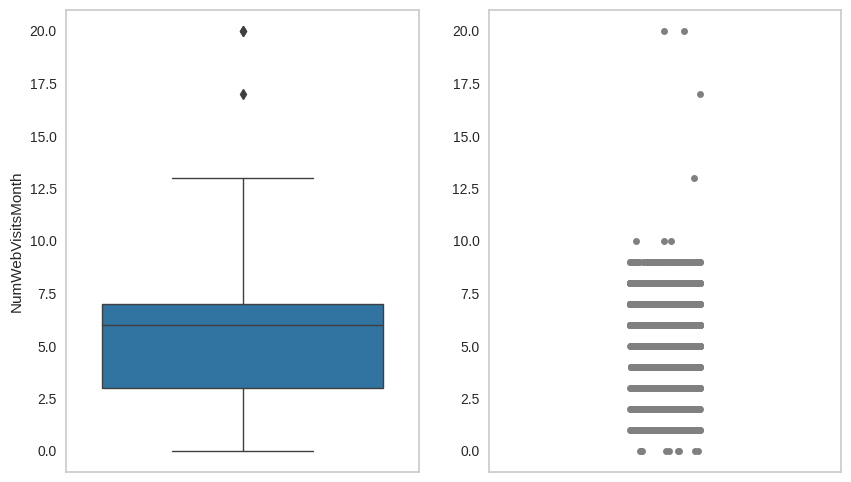

In [ ]:
plot_num(place, 'NumWebVisitsMonth')

Nesse caso, não removemos os outliers, pois é possível o site ter sido acessado 20 vezes. Podemos até considerar que seja um cliente de alto valor.

**Obervações:**

* A frequência média de compras é de 12 vezes, considerando todos os canais disponíveis.
* A loja física, dentre os canais disponíveis, é o local de preferência dos clientes.
* O acesso médio ao site da empresa por cliente foi de cinco vezes no último mês, no entanto, identificamos um caso em que um cliente acessou o site 20 vezes no mesmo período
* Apesar de atingir o máximo de 28 compras, o catálogo é o canal menos utilizado entre as opções disponíveis.


## Juntando os Dados

In [ ]:
df_lista = [people, products, promotion, place]

Fizemos o merge de duas tabelas por vez.

In [ ]:
df_final = reduce(lambda df1, df2: pd.merge(df1, df2, on='ID'), df_lista)

In [ ]:
num_linhas = df_final.shape[0]
num_colunas = df_final.shape[1]

print(f"O conjunto de dados contém {num_linhas} linhas e {num_colunas} colunas.")

O conjunto de dados contém 2203 linhas e 25 colunas.


In [ ]:
df_final.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Income',
 'Recency',
 'Marital_Status_Divorced',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'ChildrenHome',
 'LifeTime',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'TotalAmountSpent',
 'AcceptedCmp',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumDealsPurchases',
 'NumWebVisitsMonth',
 'TotalPurchases']

Removemos o *ID*.

In [ ]:
df_final.drop(columns=['ID'], inplace=True)

## Normalização

Dado que as variáveis apresentam magnitudes diversas, com valores tanto maiores quanto menores, optamos por normalizá-las para o intervalo entre zero e um. Essa preparação é importante para garantir que o algoritmo K-means funcione de maneira adequada, já que ele é sensível à escala das variáveis.
Utilizamos a função *MinMax* do scikit-learn para realizar essa normalização, porém também é possível criar uma função personalizada para isso (conforme exemplo abaixo).

In [ ]:
# exemplo de função para normalização
'''def scaler(df):
    # df temporário
    df2 = df.copy()
    for column in df2:
        # calcular o minimo e maximo de cada coluna
        minimo = df2[column].min()
        maximo = df2[column].max()
        # calculo
        df2[column] = (df[column] - minimo)/(maximo - minimo)
    return df2

scaled_df = scaler(df_final)''

In [ ]:
# função MinMax

# Cria uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Aplica a normalização em todas as colunas do DataFrame
scaled_df = pd.DataFrame(scaler.fit_transform(df_final), columns=df_final.columns)

In [ ]:
scaled_df.describe()

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome,LifeTime,...,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,...,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,0.516179,0.615070,0.309517,0.494858,0.103495,0.214707,0.647299,0.034498,0.316689,0.506590,...,0.053607,0.134151,0.238604,0.089877,0.330002,0.164580,0.505419,0.241032,0.265138,0.374255
std,0.208790,0.251205,0.132629,0.292626,0.304674,0.410712,0.477919,0.182547,0.249584,0.289392,...,0.064434,0.121894,0.239412,0.178555,0.120862,0.139301,0.148665,0.172198,0.117599,0.231731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339286,0.500000,0.205796,0.242424,0.000000,0.000000,0.000000,0.000000,0.000000,0.258941,...,0.009126,0.042521,0.024235,0.000000,0.250000,0.000000,0.400000,0.083333,0.150000,0.161290
50%,0.535714,0.500000,0.305883,0.494949,0.000000,0.000000,1.000000,0.000000,0.333333,0.509299,...,0.034950,0.094632,0.154946,0.000000,0.333333,0.150000,0.500000,0.200000,0.300000,0.354839
75%,0.660714,0.750000,0.412801,0.747475,0.000000,0.000000,1.000000,0.000000,0.333333,0.756795,...,0.074329,0.189881,0.413190,0.200000,0.400000,0.250000,0.600000,0.333333,0.350000,0.580645
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Método de Elbow

O método Elbow é uma estratégia para determinar o número ideal de clusters (denotado por k). Esse procedimento implica testar distintos valores de k e identificar o ponto em que a diminuição da variação dentro dos clusters desacelera, assemelhando-se a um "cotovelo" em um gráfico. Este ponto é comumente selecionado como o número ótimo de clusters para o algoritmo K-means. No caso do projeto, o número ideal de clusters identificado é 4.

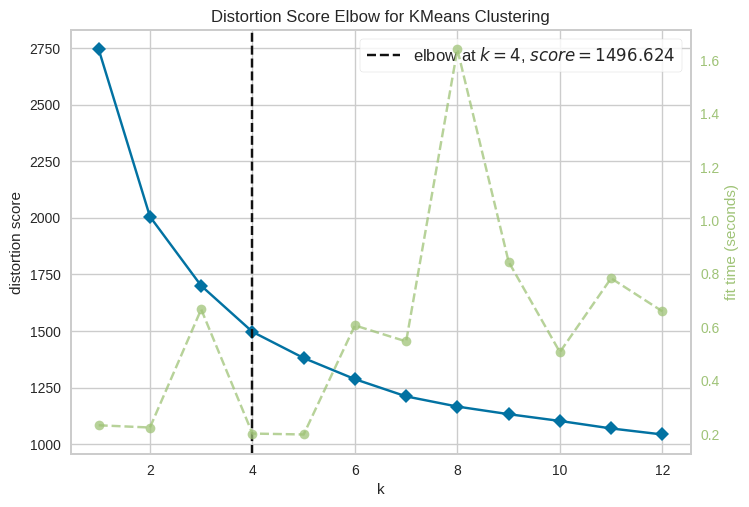

In [ ]:
# Número máximo de clusters para testar
n_clusters = 13

# Instanciando o modelo KMeans
modelo_kmeans = KMeans()

# Instanciando o visualizador do método Elbow
Elbow_M = KElbowVisualizer(modelo_kmeans, k=(1, n_clusters))

# Ajustando o modelo aos dados
Elbow_M.fit(scaled_df)

# Exibindo o gráfico Elbow
Elbow_M.show()

plt.show()

Aqui temos outra forma de gerar essa visualização.

Este código aplica o algoritmo K-means para diferentes números de clusters (de 1 a 13) em um conjunto de dados normalizado. Ele calcula e armazena a inércia (soma das distâncias quadráticas dentro dos clusters) para cada número de clusters. Essa informação pode ser usada para identificar o número ótimo de clusters através do método Elbow.


In [ ]:
inertia = []
num_clusters = range(1, 14) # de 1 a 13 clusters

for k in num_clusters:
  # aplica o modelo de ML
    Model = KMeans(n_clusters=k)
    # treinamento do modelo (conjunto de dados normalizado)
    Model.fit(scaled_df)
    inertia.append(Model.inertia_)

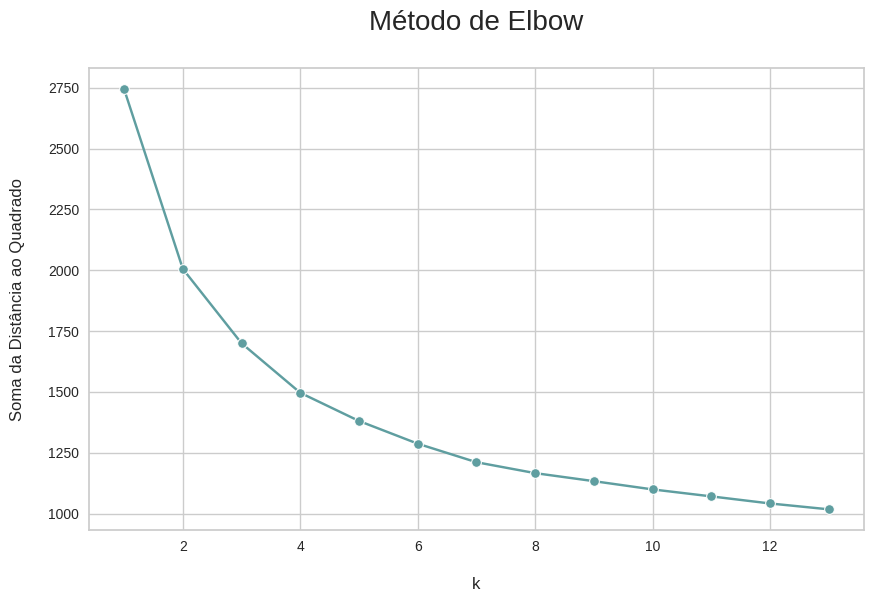

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=num_clusters, y=inertia, color='cadetblue', marker='o')
plt.xlabel('\nk', size=12)
plt.ylabel('Soma da Distância ao Quadrado\n', size=12)
plt.title('Método de Elbow\n', size=20)
plt.show()

Segundo o método Elbow, o ideal seria 4 clusters.

## Alocação de Pesos

A alocação de pesos atribui importâncias diferenciadas às variáveis, considerando sua influência relativa na formação de clusters. Normalmente, discute-se com a área de negócio para entender como será essa alocação.

Realizamos a seguinte alocação:

* *TotalAmountSpent* (8) e *TotalPurchases* (6) os fatores mais significativos, destacando gastos e volume de compras.
* *Recency* (4) e *NumWebVisitsMonth* (4) são relevantes, mas menos determinantes.
* *Income* (4) e *LifeTime* (4) refletem o poder aquisitivo e a fidelidade ao longo do tempo.
* *Year_Birth* (2), *ChildrenHome* (2) e *Education* (2) têm menor peso, sugerindo relevância, mas não tão crítica.

In [ ]:
scaled_df.columns.tolist()

['Year_Birth',
 'Education',
 'Income',
 'Recency',
 'Marital_Status_Divorced',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'ChildrenHome',
 'LifeTime',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'TotalAmountSpent',
 'AcceptedCmp',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumDealsPurchases',
 'NumWebVisitsMonth',
 'TotalPurchases']

In [ ]:
scaled_df.TotalAmountSpent  = 8*scaled_df.TotalAmountSpent
scaled_df.TotalPurchases    = 6*scaled_df.TotalPurchases
scaled_df.Recency           = 4*scaled_df.Recency
scaled_df.NumWebVisitsMonth = 4*scaled_df.NumWebVisitsMonth
scaled_df.Income            = 4*scaled_df.Income
scaled_df.LifeTime          = 4*scaled_df.LifeTime
scaled_df.Year_Birth        = 2*scaled_df.Year_Birth
scaled_df.ChildrenHome      = 2*scaled_df.ChildrenHome
scaled_df.Education         = 2*scaled_df.Education

In [ ]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2203.0,1.032358,0.417580,0.0,0.678571,1.071429,1.321429,2.0
Education,2203.0,1.230141,0.502410,0.0,1.000000,1.000000,1.500000,2.0
Income,2203.0,1.238068,0.530515,0.0,0.823182,1.223532,1.651204,4.0
Recency,2203.0,1.979431,1.170504,0.0,0.969697,1.979798,2.989899,4.0
Marital_Status_Divorced,2203.0,0.103495,0.304674,0.0,0.000000,0.000000,0.000000,1.0
Marital_Status_Single,2203.0,0.214707,0.410712,0.0,0.000000,0.000000,0.000000,1.0
Marital_Status_Together,2203.0,0.647299,0.477919,0.0,0.000000,1.000000,1.000000,1.0
Marital_Status_Widow,2203.0,0.034498,0.182547,0.0,0.000000,0.000000,0.000000,1.0
ChildrenHome,2203.0,0.633379,0.499168,0.0,0.000000,0.666667,0.666667,2.0
LifeTime,2203.0,2.026362,1.157569,0.0,1.035765,2.037196,3.027182,4.0


## Kmeans

O algoritmo K-Means é uma técnica de clustering amplamente utilizada para segmentar dados em grupos distintos. Sua operação inicia-se com a seleção aleatória de centros para os clusters, seguida pela atribuição de cada ponto ao cluster mais próximo. Os centróides são recalculados, e esse processo se repete até a convergência. Em nosso projeto, adotando o método Elbow, o modelo foi configurado com 4 clusters e ajustado aos dados normalizados. Esse procedimento proporciona a cada ponto uma atribuição específica a um cluster, possibilitando uma análise eficaz e uma segmentação coerente do conjunto de dados.

In [ ]:
Model = KMeans(n_clusters=4)

In [ ]:
# treinamento e alocação dos clusters
clusters = Model.fit_predict(scaled_df)

In [ ]:
# array com o numero de clusters
clusters

array([1, 0, 3, ..., 3, 3, 0], dtype=int32)

In [ ]:
df_final['cluster'] = clusters

In [ ]:
df_final

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome,LifeTime,...,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases,cluster
0,1957,2,58138.0,58,0,1,0,0,0,25.366667,...,0.054422,1617,1,0.363636,0.454545,0.181818,0.136364,7,22,1
1,1954,2,46344.0,38,0,1,0,0,2,7.033333,...,0.222222,27,0,0.250000,0.250000,0.500000,0.500000,5,4,0
2,1965,2,71613.0,26,0,0,1,0,0,13.666667,...,0.054124,776,0,0.400000,0.100000,0.500000,0.050000,4,20,3
3,1984,2,26646.0,26,0,0,1,0,1,7.900000,...,0.094340,53,0,0.333333,0.000000,0.666667,0.333333,6,6,0
4,1981,4,58293.0,94,0,0,1,0,1,8.633333,...,0.035545,422,0,0.357143,0.214286,0.428571,0.357143,5,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,1967,2,61223.0,46,0,0,1,0,1,15.966667,...,0.184191,1341,0,0.562500,0.187500,0.250000,0.125000,5,16,1
2199,1946,4,64014.0,56,0,0,1,0,3,3.900000,...,0.018018,444,1,0.533333,0.133333,0.333333,0.466667,7,15,3
2200,1981,2,56981.0,91,1,0,0,0,0,8.433333,...,0.019339,1241,1,0.111111,0.166667,0.722222,0.055556,6,18,3
2201,1956,3,69245.0,8,0,0,1,0,1,8.466667,...,0.072361,843,0,0.285714,0.238095,0.476190,0.095238,3,21,3


### Salvando o modelo

In [ ]:
# salvando o modelo
filename = 'modelo_finalizado.sav'
pickle.dump(Model, open(filename, 'wb'))

In [ ]:
# carregando o modelo
# Model = pickle.load(open(filename, 'rb'))

## Análise dos Clusters

In [ ]:
cluster_counts = df_final['cluster'].value_counts().reset_index().rename(columns={'index': 'Cluster', 'cluster': 'Número de Clientes'})
print(cluster_counts)

   Cluster  Número de Clientes
0        3                 635
1        2                 581
2        0                 578
3        1                 409


In [ ]:
# Para aparecer todas as colunas
pd.set_option('display.max_columns', None)

In [ ]:
# Médias das variaveis agrupadas pelos clusters
df_final.groupby('cluster').mean().T

cluster,0,1,2,3
Year_Birth,1971.237024,1968.674817,1970.087780,1965.851969
Education,2.401384,2.577017,2.311532,2.574803
Income,36635.704152,77309.687042,36539.932874,63669.867717
Recency,23.077855,50.701711,74.156627,48.450394
Marital_Status_Divorced,0.096886,0.102689,0.101549,0.111811
Marital_Status_Single,0.224913,0.251834,0.216867,0.179528
Marital_Status_Together,0.648789,0.611247,0.660929,0.656693
Marital_Status_Widow,0.029412,0.034230,0.020654,0.051969
ChildrenHome,1.221453,0.288509,1.273666,0.833071
LifeTime,14.109054,17.043765,14.436202,15.254068


### Visualizações

In [ ]:
def plot_clusters(df, column):
    colors = sns.color_palette("pastel", n_colors=len(df['cluster'].unique()))

    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(1, 2)

    # Boxplot
    ax_boxplot = fig.add_subplot(gs[0, 0])
    sns.boxplot(x='cluster', y=column, data=df, ax=ax_boxplot, palette=colors, linewidth=1)
    ax_boxplot.set_ylabel(column)
    ax_boxplot.set_xlabel('cluster')
    ax_boxplot.yaxis.grid(False)

    # Stripplot
    ax_stripplot = fig.add_subplot(gs[0, 1])
    sns.stripplot(x='cluster', y=column, data=df, ax=ax_stripplot, palette=colors)
    ax_stripplot.set_ylabel(None)
    ax_stripplot.yaxis.grid(False)
    ax_stripplot.set_xlabel('cluster')

    plt.show()

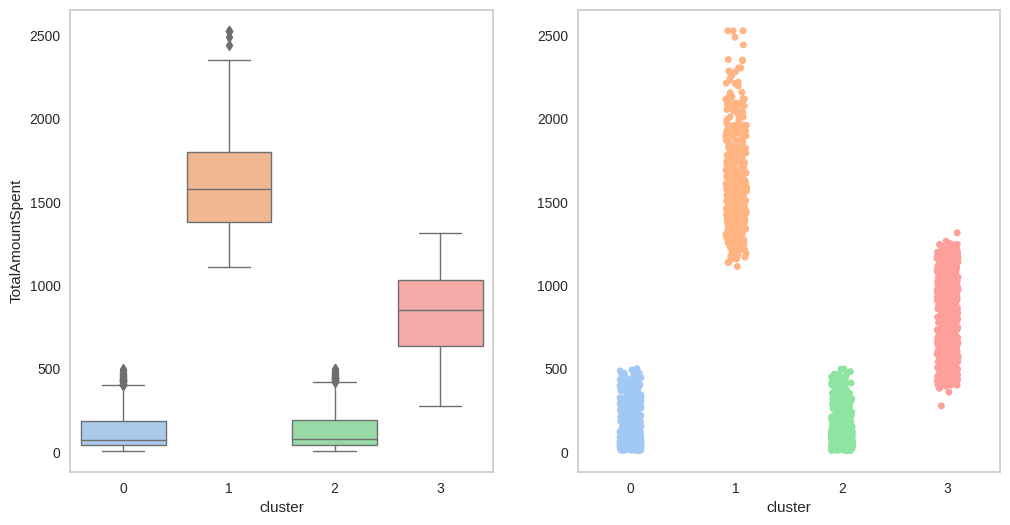

In [ ]:
plot_clusters(df_final, 'TotalAmountSpent')

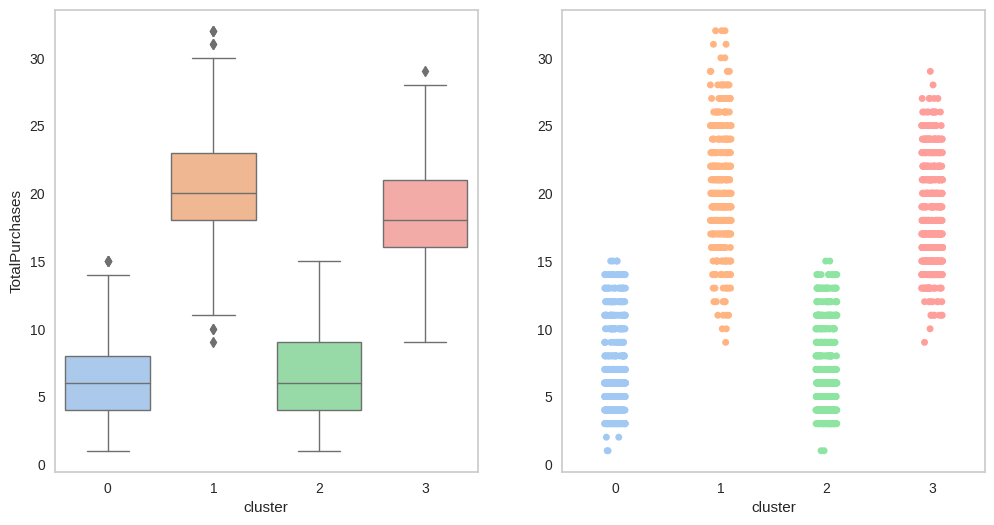

In [ ]:
plot_clusters(df_final, 'TotalPurchases')

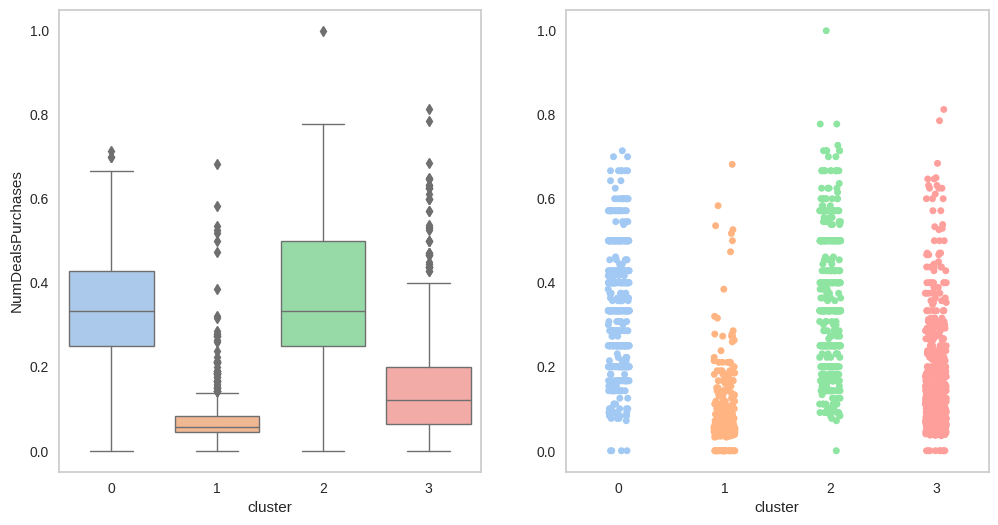

In [ ]:
plot_clusters(df_final, 'NumDealsPurchases')

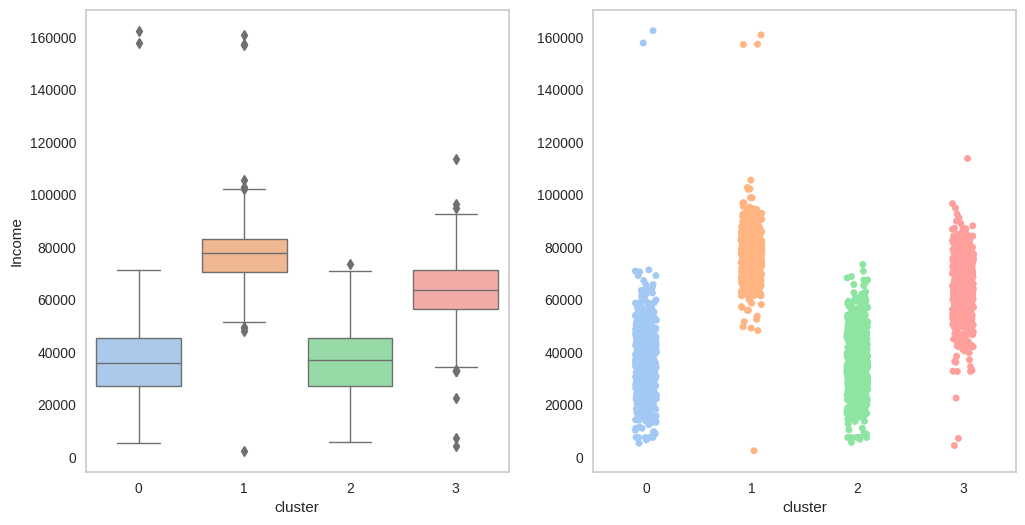

In [ ]:
plot_clusters(df_final, 'Income')

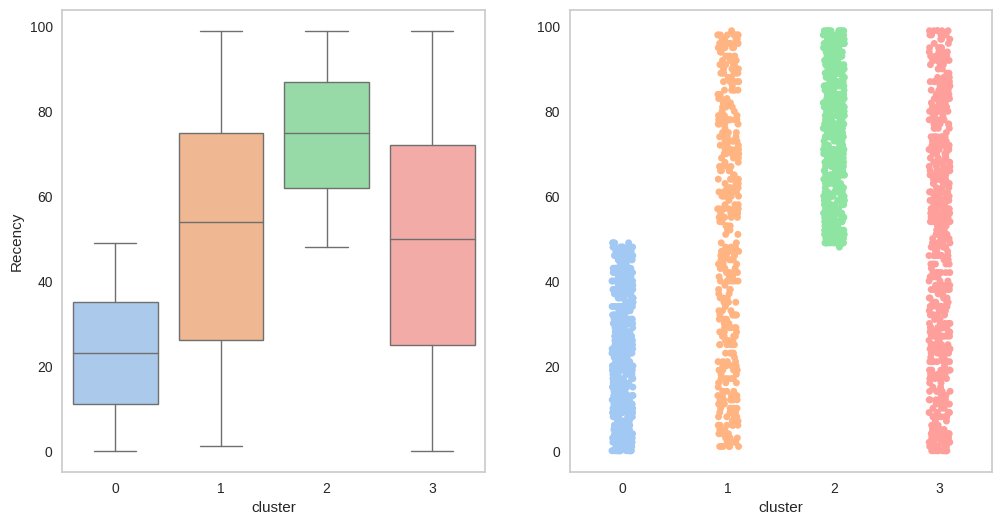

In [ ]:
plot_clusters(df_final, 'Recency')

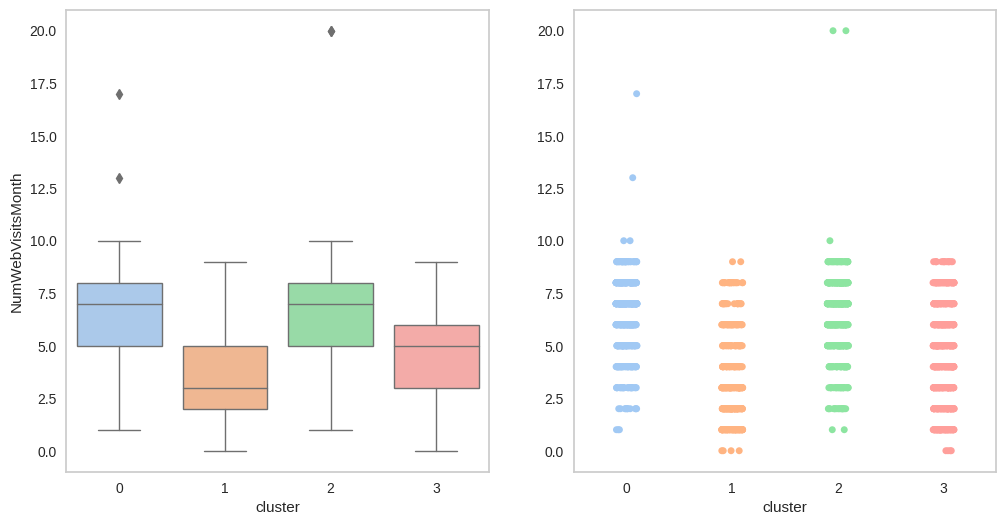

In [ ]:
plot_clusters(df_final, 'NumWebVisitsMonth')

### Análise

### **Cluster 0**: Clientes Dinâmicos

O grupo 0 representa clientes mais jovens, com menor poder aquisitivo, porém, são os mais ativos dentro da empresa. Caracterizados por um cadastro mais recente, esses consumidores têm preferência por compras em promoções, tanto na loja física quanto online. Mostram interesse em explorar ofertas no site, indicando uma atenção especial às promoções. Similar ao grupo 2, eles também têm uma preferência por produtos da categoria 'gold' e, notavelmente, por vinhos.

### **Cluster 1**: Clientes Premium

O grupo 1 destaca-se como o grupo de maior valor, caracterizado por uma menor base de clientes. Este segmento é composto por indivíduos de alta renda e elevado nível educacional, demonstrando uma preferência marcante por compras presenciais, seja diretamente na loja física ou por catálogo. Apesar de não serem frequentes nas compras online ou em promoções, esses clientes são notáveis por apresentarem o maior ticket médio entre todos os grupos. As categorias de carne e vinhos são suas preferidas, especialmente no caso da carne, onde consomem mais do que outros grupos. A maioria não possui filhos em casa e mantém uma longa fidelidade ao cadastro, sendo participativos em campanhas de marketing.

### **Cluster 2**: Clientes em Crescimento

O grupo 2 representa um grupo mais jovem, caracterizado pelo menor poder aquisitivo e nível educacional inferior em comparação com os outros grupos. Apesar de ser o menos ativo, é importante para a empresa atentar-se a este segmento, pois está demonstrando sinais de churn. Com maior presença de crianças em casa, este grupo é receptivo a campanhas direcionadas ao público infantil. Embora prefiram compras presenciais, são os que mais utilizam promoções. Este grupo é mais propenso a visitar o site e demonstra preferência por produtos 'gold'.

### **Cluster 3**: Clientes Consistentes

O grupo 3, embora apresente o menor ticket médio, é significativo para a empresa devido ao seu volume considerável de compras, resultando em uma receita substancial. Composto por clientes mais velhos, com salário anual elevado e geralmente com um filho em casa, este grupo é mais propenso a escolher a loja física, mas ainda utiliza o site para compras. Apresentam um alto nível educacional e têm uma apreciação marcante pela categoria de vinhos. Apesar de não se destacarem nas compras com desconto, contribuem consistentemente para a receita da empresa.
